In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
import iventure.utils_plot

In [4]:
prng = np.random.RandomState(10)

#### Prepare the population schema.

In [5]:
varnames = [
    'Country_of_Operator',
    'Operator_Owner',
    'Users',
    'Purpose',
    'Class_of_Orbit',
    'Type_of_Orbit',
    'Perigee_km',
    'Apogee_km',
    'Eccentricity',
    'Period_minutes',
    'Launch_Mass_kg',
    'Dry_Mass_kg',
    'Power_watts',
    'Date_of_Launch',
    'Anticipated_Lifetime',
    'Contractor',
    'Country_of_Contractor',
    'Launch_Site',
    'Launch_Vehicle',
    'Source_Used_for_Orbital_Data',
    'longitude_radians_of_geo',
    'Inclination_radians',
]

In [6]:
schema = [
    ('categorical', {'k': 79}),  # 0 Country_of_Operator
    ('categorical', {'k': 346}), # 1 Operator_Owner
    ('categorical', {'k': 18}),  # 2 Users
    ('categorical', {'k': 46}),  # 3 Purpose
    ('categorical', {'k': 4}),   # 4 Class_of_Orbit
    ('categorical', {'k': 7}),   # 5 Type_of_Orbit
    ('normal', None),            # 6 Perigee_km
    ('normal', None),            # 7 Apogee_km
    ('normal', None),            # 8 Eccentricity
    ('normal', None),            # 9 Period_minutes
    ('normal', None),            # 10 Launch_Mass_kg
    ('normal', None),            # 11 Dry_Mass_kg
    ('normal', None),            # 12 Power_watts
    ('normal', None),            # 13 Date_of_Launch
    ('normal', None),            # 14 Anticipated_Lifetime
    ('categorical', {'k': 282}), # 15 Contractor
    ('categorical', {'k': 54}),  # 16 Country_of_Contractor
    ('categorical', {'k': 25}),  # 17 Launch_Site
    ('categorical', {'k': 141}), # 18 Launch_Vehicle
    ('categorical', {'k': 38}),  # 19 Source_Used_for_Orbital_Data
    ('normal', None),            # 20 longitude_radians_of_geo
    ('normal', None),            # 21 Inclination_radians
]

In [7]:
from cgpm2.feralcat import CrossCat
from cgpm2.feralcat import make_default_inference_program

In [8]:
crosscat = CrossCat(range(len(schema)), [], schema, 60, prng)

In [9]:
df = pd.read_csv('../resources/satellites.coded.csv', index_col=False)

In [10]:
rowids = range(len(df))
observations = [dict(zip(range(len(row)), row.values)) for _i, row in df.iterrows()]
crosscat.observe_bulk(rowids, observations)

In [11]:
inference = make_default_inference_program(N=250)

In [12]:
crosscat.transition(inference)

Completed: 250 iterations in 130.490002 seconds.
Completed: 250 iterations in 132.235800 seconds.
Completed: 250 iterations in 133.446660 seconds.
Completed: 250 iterations in 133.630723 seconds.
Completed: 250 iterations in 134.379195 seconds.
Completed: 250 iterations in 136.876918 seconds.
Completed: 250 iterations in 137.653052 seconds.
Completed: 250 iterations in 138.197229 seconds.
Completed: 250 iterations in 138.320922 seconds.
Completed: 250 iterations in 138.379750 seconds.
Completed: 250 iterations in 138.833728 seconds.
Completed: 250 iterations in 138.778222 seconds.
Completed: 250 iterations in 139.165589 seconds.
Completed: 250 iterations in 139.411525 seconds.
Completed: 250 iterations in 139.713404 seconds.
Completed: 250 iterations in 139.580744 seconds.
Completed: 250 iterations in 139.842244 seconds.
Completed: 250 iterations in 139.889909 seconds.
Completed: 250 iterations in 139.902689 seconds.
Completed: 250 iterations in 139.986196 seconds.
Completed: 250 itera

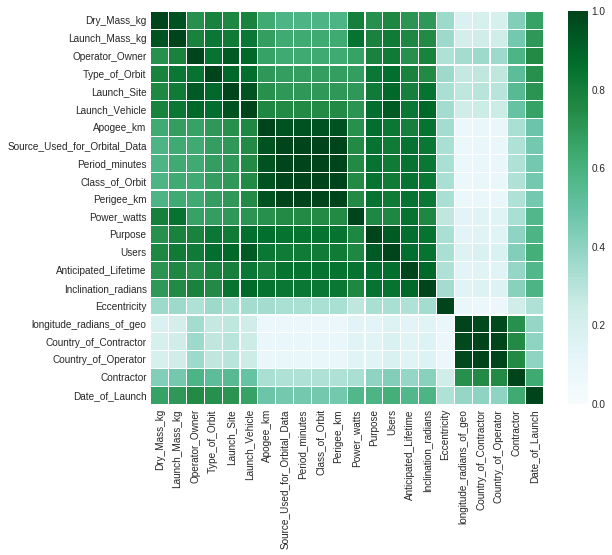

In [13]:
D = crosscat.get_same_assignment_column_pairwise()
dependence = iventure.utils_plot.tidy_pairwise(np.mean(D, axis=0), index=varnames, columns=varnames)
iventure.utils_plot.heatmap(dependence)

In [14]:
crosscat.transition(inference)

Completed: 250 iterations in 132.027504 seconds.
Completed: 250 iterations in 132.679820 seconds.
Completed: 250 iterations in 133.690059 seconds.
Completed: 250 iterations in 134.103124 seconds.
Completed: 250 iterations in 136.267132 seconds.
Completed: 250 iterations in 137.194169 seconds.
Completed: 250 iterations in 137.278984 seconds.
Completed: 250 iterations in 137.584331 seconds.
Completed: 250 iterations in 138.155238 seconds.
Completed: 250 iterations in 138.775504 seconds.
Completed: 250 iterations in 138.871697 seconds.
Completed: 250 iterations in 138.710030 seconds.
Completed: 250 iterations in 138.922480 seconds.
Completed: 250 iterations in 139.336919 seconds.
Completed: 250 iterations in 139.553635 seconds.
Completed: 250 iterations in 140.001073 seconds.
Completed: 250 iterations in 140.551884 seconds.
Completed: 250 iterations in 140.974096 seconds.
Completed: 250 iterations in 141.138548 seconds.
Completed: 250 iterations in 141.064033 seconds.
Completed: 250 itera

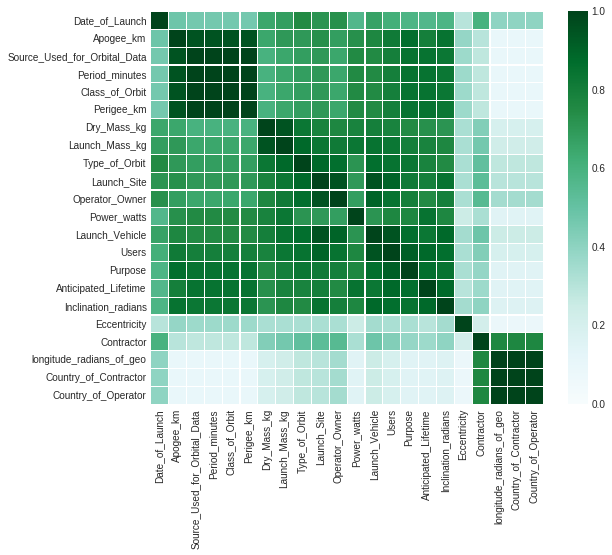

In [15]:
D = crosscat.get_same_assignment_column_pairwise()
dependence = iventure.utils_plot.tidy_pairwise(np.mean(D, axis=0), index=varnames, columns=varnames)
iventure.utils_plot.heatmap(dependence)